# S1: Oxygen levels analysis
This study aims to **confirm that critical conditions in oxygen levels are not reached in our simulations**. The model is prepared to respond to hypoxia (levels of oxygen of <5%) by decreasing cell proliferation and promoting cell death. Thus, it is important to evaluate the oxygen concentration values through our simulations, in order to assure that these cellular processes are not being influenced by oxygen.

In [1]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import physipy as phypy

We will be looking into the oxygen levels at different points in time. We only consider simulations that refer to multicellular cluster growth, as the **oxygen consumption by a single cell in the first setup is not significant**.

In [14]:
SUBSTANCE = 'oxygen'
BASE_FILE = Path('../data/Final_550_72')

# Oxygen levels at day 5
## Data analysis
Starting with a visual analysis, let's plot some **heatmaps** to represent the **oxygen concentration** in matrices of different collagen density values. Firstly, we need to choose a plane of the domain, since we will be representing the heatmaps in 2D. The **middle plane of the domain (z=0)** is expected to be the plane of **highest cell density**. Consequently, oxygen consumption should be maximal at this plane, which makes it a good choice for us. Furthermore, we need to choose a **single replicate** for this analysis, but later on we will confirm our results with numerical data from all replicates.

To create these heatmaps we first need to **load the microenvironment data** from the `.mat` PhysiCell files. To do so, we will be using the `get_me_data` function from `physipy` (for more information see the corresponding notebook), which returns a data structure with the substances concentrations at the middle plane of the domain (considering the z-axis). We can use this data to plot the heatmaps directly.

Text(0.5, 1.02, 'Oxygen concentration at the middle plane of the domain [mmHg]')

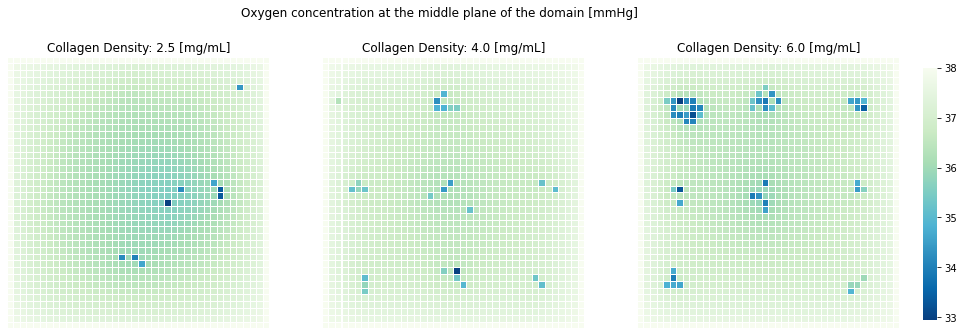

In [19]:
timestep = 5
replicate = 2
all_densities_values = [2.5, 4.0, 6.0]
all_densities_folders = ['Low', 'Med', 'High']

# Create figure object
fig, axes = plt.subplots(1, 3, figsize=(16, 5), sharex=True, sharey=True)
# Create additional ax for the colorbar
colorbar = fig.add_axes([.92, .15, .012, .7])
# Set the colorbar parameters as null to only generate a colorbar for one ax
cbar_bool = False
cbar_ax = None

for index, density in enumerate(all_densities_folders):
    # Create path
    base_file = BASE_FILE / '{}Density/output{}/'.format(density, replicate)

    # Create a colorbar for the last ax
    if index == 2:
        cbar_bool = True
        cbar_ax = colorbar
    
    # Load microenvironment data
    substance_data = phypy.get_me_data(timestep, SUBSTANCE, base_file)
    
    # Plot heatmap
    sns.heatmap(substance_data, ax=axes[index],
                cmap="GnBu_r", linewidths=0.01, 
                xticklabels=False, yticklabels=False,
                cbar=cbar_bool, cbar_ax=cbar_ax)
    
    # Figure aesthetics
    axes[index].set_title('Collagen Density: {} [mg/mL]'.format(all_densities_values[index]))
    
plt.suptitle('Oxygen concentration at the middle plane of the domain [mmHg]', y=1.02)

## Conclusions
At day 5, although there is a decrease in oxygen levels in matrices of high collagen density, in the regions where the clusters are located, it is **not sufficient to promote hypoxia-induced behaviours in cells**.

# Oxygen levels at day 7
## Data analysis
We will repeat the same analysis for day 7. We will not consider the cells grown in low density matrices as we did not run simulations for this configuration.

Text(0.5, 1.02, 'Oxygen concentration at the middle plane of the domain [mmHg]')

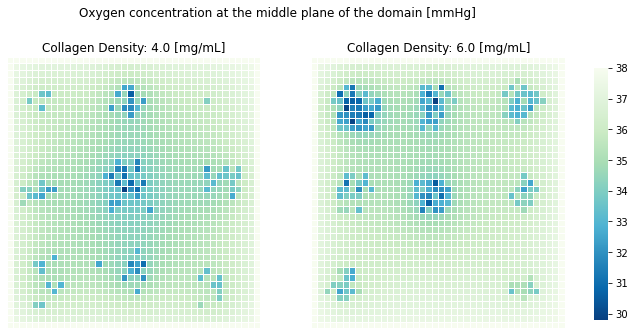

In [21]:
timestep = 7
densities_values = [4.0, 6.0]
densities_folders = ['Med', 'High']

# Create figure object
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharex=True, sharey=True)
# Create additional ax for the colorbar
colorbar = fig.add_axes([.94, .15, .02, .7])
# Set the colorbar parameters as null to only generate a colorbar for one ax
cbar_bool = False
cbar_ax = None

for index, density in enumerate(densities_folders):
    # Create path
    file = BASE_FILE / '{}Density/output{}/'.format(density, replicate)
    
    # Create a colorbar for the last ax
    if index == 1:
        cbar_bool = True
        cbar_ax = colorbar
    
    # Load microenvironment data
    substance_data = phypy.get_me_data(timestep, SUBSTANCE, file)
    
    # Plot heatmap
    sns.heatmap(substance_data, ax=axes[index],
                cmap="GnBu_r", linewidths=0.01, 
                xticklabels=False, yticklabels=False,
                cbar=cbar_bool, cbar_ax=cbar_ax)
    
    # Figure aesthetics
    axes[index].set_title('Collagen Density: {} [mg/mL]'.format(densities_values[index]))
    
plt.suptitle('Oxygen concentration at the middle plane of the domain [mmHg]', y=1.02)
#plt.savefig('Oxygen_{}.eps'.format(timestep), format='eps', dpi=600,bbox_inches="tight", transparent=False)

## Conclusions
Once again, we observe that the oxygen pressure values **never reach values that could induce changes in cell phenotype**.

# Oxygen levels through time
## Data analysis
Finally, to conclude this study we will perform a **quantitative analysis** considering the data from all replicates for the medium and high collagen densities. Particularly, we will go through each replicate and compute the **minimum oxygen pressure value at the middle plane, at different time points**. 

In [28]:
timesteps = [1, 3, 5, 7]
number_of_replicates = 10
min_values = []

for timestep in timesteps:
    for density, density_value in zip(densities_folders, densities_values):
        for replicate in range(1, number_of_replicates + 1):
            # Create path
            file = BASE_FILE / '{}Density/output{}/'.format(density, replicate)
            
            # Load microenvironment data
            substance_data = phypy.get_me_data(timestep, SUBSTANCE, file)
            
            # Compute and store minimum value for each replicate
            min_value = substance_data.min()
            min_values.append([density, density_value, replicate, timestep, min_value])

# Convert to DataFrame
min_values_df = pd.DataFrame(min_values, columns=['density', 'collagen_concentration', 
                                                  'replicate', 'time', 'min_value'])

Using this data, we can plot the distribution of the minimum values through time for both collagen densities.

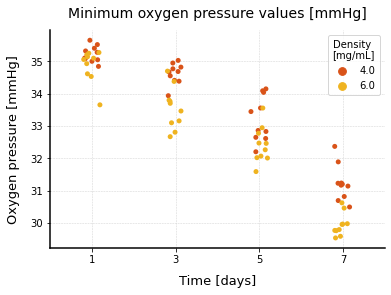

In [43]:
# Set palette to match the collagen density colors in the paper
sns.set_palette(['#d95319', '#efb320'])

# Create minimum values distribution plot
fig, ax = plt.subplots()
sns.stripplot(data=min_values_df, x='time', y='min_value', 
              ax=ax, hue='collagen_concentration')

# Figure aesthetics
ax.set_title('Minimum oxygen pressure values [mmHg]', y=1.03, fontsize=14)
ax.set_ylabel('Oxygen pressure [mmHg]', labelpad=10, fontsize=13)
ax.set_xlabel('Time [days]', labelpad=10, fontsize=13)
ax.legend(title='Density \n[mg/mL]')

# Grid
ax.yaxis.grid(color='lightgray', linestyle='--', linewidth=0.5, zorder=-1)
ax.xaxis.grid(color='lightgray', linestyle='--', linewidth=0.5, zorder=-1)


# Spines
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_linewidth(1.5)
    spine.set_edgecolor('black')
    
sns.despine()

## Conclusions
In conclusion, despite the slight decrease in oxygen levels, which is most prevalent in high density matrices, **we do not expect cells to be influenced by hypoxia levels**, which only start at 5% oxygen levels. This is coherent with our belief that the **experimental conditions do not promote hypoxia either**, as the collagen matrices used are highly permeable to oxygen and, thus, are expected to be well-oxygenated through these experimental trials.